In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [212]:
# Remember to change back to the file path
# df = pd.read_csv('E:/MSBA/Semester 1/DBA5102 BA Capstone/XAI project/data.csv')
df = pd.read_csv('data.csv')

In [213]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.columns

In [ ]:
df.isnull().sum()

Thus there is no missing values that need to handle

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df['Over18'].unique() # Useless (Everyone over 18)
df['EmployeeCount'].unique() # Useless (Only 1)
df['StandardHours'].unique() # Useless (Everyone 80 hours)

In [ ]:
df.dtypes

In [ ]:
num_var = ['Age','DailyRate','DistanceFromHome','Education','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','HourlyRate','JobInvolvement',
'JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']

boxplot = df.boxplot(column = num_var, grid=False, rot=90, fontsize=8)  


In [ ]:
num_var_ = ['MonthlyIncome']
boxplot = df.boxplot(column = num_var_, grid=False, rot=0, fontsize=15)  

In [ ]:
num_1 = ['Age','DistanceFromHome','Education','EmployeeCount']
boxplot = df.boxplot(column = num_1, grid=False, rot=45, fontsize=15)  

In [ ]:
num_2 = ['EmployeeNumber','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel']
boxplot = df.boxplot(column = num_2, grid=False, rot=45, fontsize=15)  

In [ ]:
num_3 = ['JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike']
boxplot = df.boxplot(column = num_3, grid=False, rot=45, fontsize=15)  

In [ ]:
num_3_ = ['NumCompaniesWorked','PercentSalaryHike']
boxplot = df.boxplot(column = num_3_, grid=False, rot=45, fontsize=15)  

In [ ]:
num_4 = ['PerformanceRating','RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears']
boxplot = df.boxplot(column = num_4, grid=False, rot=45, fontsize=15)  

In [ ]:
num_4_ = ['PerformanceRating','StockOptionLevel', 'TotalWorkingYears']
boxplot = df.boxplot(column = num_4_, grid=False, rot=45, fontsize=15)  

In [ ]:
num_4__ = ['PerformanceRating']
boxplot = df.boxplot(column = num_4__, grid=False, rot=45, fontsize=15)  

In [ ]:
num_5 = ['TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']
boxplot = df.boxplot(column = num_5, grid=False, rot=90, fontsize=15)  

In [ ]:
# Outliers: [MonthlyIncome, NumCompaniesWorked, PerformanceRating, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager] 

In [ ]:
plt.figure(figsize=(5,5))
explode_val = (0,0.4,0,0.1)
df.groupby('Attrition')['Age'].count().plot(kind='pie',autopct='%1.1f%%', ylabel='', wedgeprops={'linewidth': 4.0, 'edgecolor':'white'}, textprops={'fontsize':17,'style':'italic','fontweight':'bold'})
plt.title('Attrition', fontsize=20, fontweight='bold')

In [ ]:
sns.catplot(x = 'Attrition', hue = 'EnvironmentSatisfaction', data=df, kind='count', legend='')

plt.xlabel('Attrition', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.legend(title='EnvironmentSatisfaction', loc='upper right', bbox_to_anchor =(1.1, 0.5, 0.6, 0.5), fontsize=14, title_fontsize=14, labels=['Low','Medium','High','Very High'])
plt.title('Attrition per EnvironmentSatisfaction', fontsize=20, fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

In [ ]:
sns.catplot(x = 'Attrition', hue = 'NumCompaniesWorked', data=df, kind='count', legend='')

plt.xlabel('Attrition', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.legend(title='# of Companies', loc='upper right', bbox_to_anchor =(1.1, 0.5, 0.6, 0.5), fontsize=14, title_fontsize=14)
plt.title('Attrition per # of Previous Companies', fontsize=20, fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

In [ ]:
sns.catplot(x = 'Attrition', hue = 'Department', data=df, kind='count', legend='')
plt.xlabel('Attrition', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.legend(title='Department', loc='upper right', bbox_to_anchor =(1.2, 0.5, 0.6, 0.5), fontsize=14, title_fontsize=14)
plt.title('Attrition per Departments', fontsize=20, fontweight='bold')
plt.yticks(fontsize=15)

In [ ]:
sns.catplot(x = 'Attrition', hue = 'BusinessTravel', data = df, kind = 'count', legend='')
plt.xlabel('Attrition', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.legend(title='BusinessTravel',loc='upper right', bbox_to_anchor =(1.2, 0.5, 0.6, 0.5), fontsize=14, title_fontsize=14)
plt.title('Attrition per BusinessTravel', fontsize=20, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [ ]:
sns.catplot(x = 'Attrition', hue = 'Education', data = df, kind = 'count', legend = '')
plt.legend(title='Education', loc='upper right',labels=['Below College','College','Bachelor','Master','Doctor'],bbox_to_anchor =(1.2, 0.6, 0.3, 0.5), fontsize=12, title_fontsize=12)
plt.xlabel('Attrition', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Attrition per Education', fontsize=20, fontweight='bold')

In [ ]:
sns.catplot(x = 'Attrition', hue = 'Gender', data = df, kind = 'count', legend='')

plt.legend(title='Gender', loc='upper right',labels=['Female','Male'],bbox_to_anchor =(1.2, 0.6, 0.3, 0.5), fontsize=15, title_fontsize=15)
plt.xlabel('Attrition', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Attrition per Gender', fontsize=20, fontweight='bold')

In [ ]:
sns.catplot(x = 'Attrition', hue = 'JobSatisfaction', data = df, kind = 'count', legend='')

plt.legend(title='JobSatisfaction', loc='upper right',labels=['Low','Medium','High', 'Very High'],bbox_to_anchor =(1.3, 0.6, 0.3, 0.5), fontsize=15, title_fontsize=15)
plt.xlabel('Attrition', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Attrition per JobSatisfaction', fontsize=20, fontweight='bold')

In [ ]:
sns.catplot(x = 'Attrition', hue = 'PerformanceRating', data = df, kind = 'count', legend='')

plt.legend(title='PerformanceRating', loc='upper right',labels=['Low','Good'],bbox_to_anchor =(1.5, 0.6, 0.3, 0.5), fontsize=15, title_fontsize=15)
plt.xlabel('Attrition', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Attrition per PerformanceRating', fontsize=20, fontweight='bold')

In [ ]:
sns.catplot(x = 'Attrition', hue = 'WorkLifeBalance', data = df, kind = 'count', legend='')

plt.legend(title='WorkLifeBalance', loc='upper right',labels=['Bad','Good','Better','Best'], bbox_to_anchor =(1.4, 0.6, 0.3, 0.5), fontsize=15, title_fontsize=15)
plt.xlabel('Attrition', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Attrition per WorkLifeBalance', fontsize=20, fontweight='bold')

# Feature selection and prepocessing

In [214]:
#features below are useless as proven by EDA steps hence we drop those four features
df.drop('EmployeeCount',axis=1,inplace=True)
df.drop('EmployeeNumber',axis=1,inplace=True)
df.drop('Over18',axis=1,inplace=True)
df.drop('StandardHours', axis=1, inplace=True)

In [ ]:
matrix = np.triu(df.corr())
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='RdBu_r')
plt.show()

Some other conclusions we get from the correlation table:

1. Job level and total working years are highly correlated.
2. Monthly Income and total working years are highly correlated.
3. Performance rating and percentage salary hike are highly correlated.
4. Years in current role and years at company are highly correlated.
5. Years with current manager and years at company are highly correlated.
6. Monthly income and job level highly correlated

In [ ]:
#attrition; business travel; department; education; gender; job role; marital status; overtime;

In [ ]:
# Handling Categorical features

# #binarize attrituion, Gender, OverTime and Attrition
# df['Male'] = df.Gender == True
# df.drop('Gender', axis = 1,inplace=True)
# df['OverTime'] = df.OverTime == True
# df['Attrition'] = df.Attrition == True

In [215]:
'''
Codes updated
'''
# Handling Categorical features

df['Male'] = np.where(df['Gender']=='Male',1,0)
df['OverTime'] = np.where(df['OverTime']=='Yes',1,0)
df['Attrition'] = np.where(df['Attrition']=='Yes',1,0)
df.drop('Gender', axis = 1,inplace=True)

In [183]:
#encoding categorical features:

df = pd.get_dummies(df, columns=['Department',
                        'EducationField','JobRole','MaritalStatus'])

****** In order to create counterfactual, it seems like we need to use Onehot encoding for all categorical data!!!

In [184]:
'''
Codes updated
'''

# Convert Business Travel to ordinal feature 
df['BusinessTravel'] = np.where(df['BusinessTravel']=='Non-Travel',0,df['BusinessTravel'])
df['BusinessTravel'] = np.where(df['BusinessTravel']=='Travel_Rarely',1,df['BusinessTravel'])
df['BusinessTravel'] = np.where(df['BusinessTravel']=='Travel_Frequently',2,df['BusinessTravel'])

In [185]:
df['BusinessTravel'] = df['BusinessTravel'].astype(int)

In [186]:
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

In [ ]:
# '''
# Original codes - standardize everything including categorical features
# '''
# #Standardization
# scaler = StandardScaler()
# X[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','TotalWorkingYears','NumCompaniesWorked','PerformanceRating','StockOptionLevel', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]=scaler.fit_transform(X[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','TotalWorkingYears','NumCompaniesWorked','PerformanceRating','StockOptionLevel', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']])
# # handling outliers

In [187]:
'''
Updated codes - scale only numerical features 
'''

#Standardization
scaler = StandardScaler()
continuous_features = ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','TotalWorkingYears','NumCompaniesWorked',
'PercentSalaryHike','TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

X[continuous_features]=scaler.fit_transform(X[continuous_features])
# handling outliers

In [188]:
#train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

# Check class imbalance in set
print('Train attrition class = {}'.format(sum(y_train == 1)))
print('Train attrition class = {}'.format(sum(y_train == 0)))
print('Test attrition class = {}'.format(sum(y_test == 1)))
print('Test attrition class = {}'.format(sum(y_test == 0)))

Train attrition class = 199
Train attrition class = 977
Test attrition class = 38
Test attrition class = 256


In [189]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check class imbalance in set
print('Train attrition class = {}'.format(sum(y_train == 1)))
print('Train attrition class = {}'.format(sum(y_train == 0)))
print('Test attrition class = {}'.format(sum(y_test == 1)))
print('Test attrition class = {}'.format(sum(y_test == 0)))

Train attrition class = 977
Train attrition class = 977
Test attrition class = 38
Test attrition class = 256


In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

#basic logistic regression model
clf = LogisticRegression().fit(X_train,y_train)
y_pred = clf.predict(X_test)
#Accuracy
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('report: ' + str(classification_report(y_test,y_pred)))
#Roc_auc score
print('ROC-AUC score' + str(roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])))
#Confusion metrics
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.8639455782312925
report:               precision    recall  f1-score   support

           0       0.93      0.92      0.92       256
           1       0.47      0.50      0.49        38

    accuracy                           0.86       294
   macro avg       0.70      0.71      0.70       294
weighted avg       0.87      0.86      0.87       294

ROC-AUC score0.7960526315789473
Confusion Matrix : 
[[235  21]
 [ 19  19]]


In [193]:
from xgboost import XGBClassifier
XGBoost = XGBClassifier(objective='binary:logistic',random_state=0,n_jobs=-1,use_label_encoder=False, eval_metric = 'aucpr') #, tree_method = 'gpu_hist'
param ={
    'reg_lambda': [0, 1e-1, 1, 10, 50],
    'n_estimators':range(100,1500,300),
    'eta':np.linspace(0.1,0.7,3),
}
# gs = GridSearchCV(estimator=finalPipe,param_grid=param,scoring = 'neg_root_mean_squared_error',n_jobs = -1,cv = 5,verbose = -1)
# finalPipe.set_params(gs.best_params_)

In [194]:
XGBoost.fit(X_train,y_train)
y_pred = XGBoost.predict(X_test)
#Accuracy
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('report: ' + str(classification_report(y_test,y_pred)))
#Roc_auc score
print('ROC-AUC score' + str(roc_auc_score(y_test, XGBoost.predict_proba(X_test)[:,1])))
#Confusion metrics
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.8537414965986394
report:               precision    recall  f1-score   support

           0       0.90      0.93      0.92       256
           1       0.41      0.32      0.36        38

    accuracy                           0.85       294
   macro avg       0.66      0.62      0.64       294
weighted avg       0.84      0.85      0.85       294

ROC-AUC score0.7626439144736843
Confusion Matrix : 
[[239  17]
 [ 26  12]]


In [195]:
x = X_test
y = y_test

Text(0.5, 0, 'Xgboost Feature Importance')

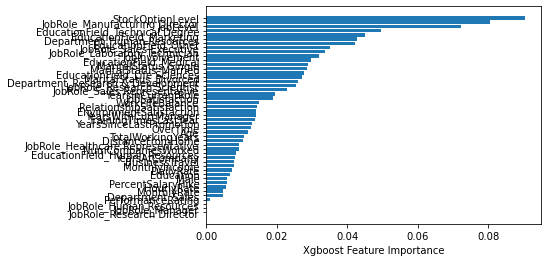

In [133]:
sorted_idx = XGBoost.feature_importances_.argsort()
plt.barh(x.columns[sorted_idx], XGBoost.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

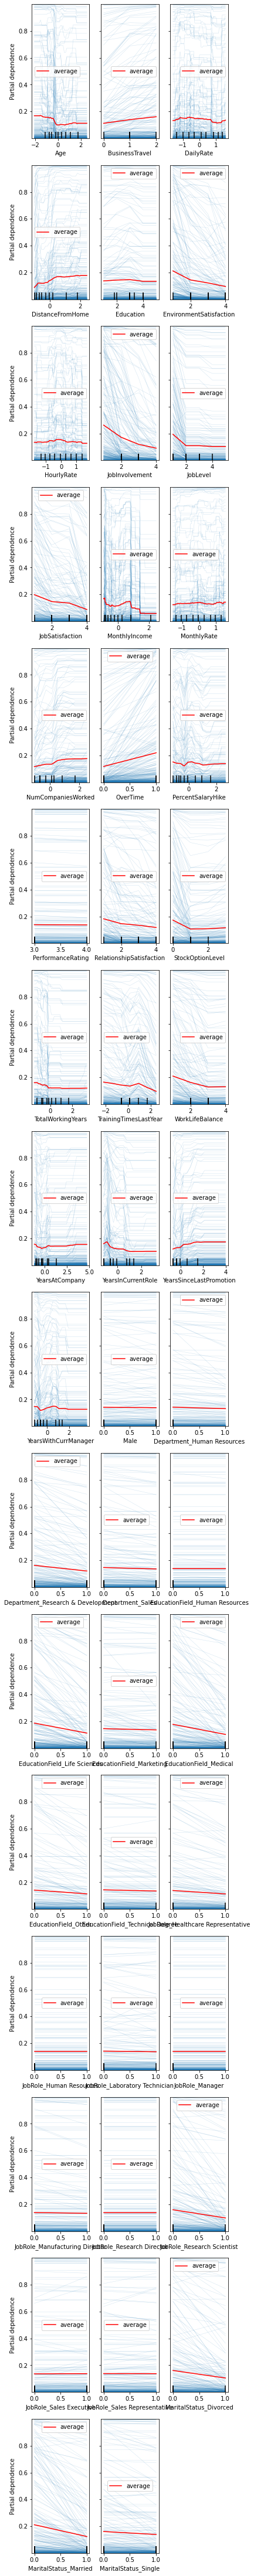

In [134]:
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
fig, ax = plt.subplots(figsize=(6, 80))
PartialDependenceDisplay.from_estimator(XGBoost, x, features=x.columns, kind ='both',ax=ax,line_kw={"color": "red"},ice_lines_kw={"color": "tab:blue", "alpha": 0.2, "linewidth": 0.5},n_jobs=-1)

In [135]:
import shap

In [136]:
f = lambda x: XGBoost.predict_proba(x)[:,1]
med = X_train.median().values.reshape((1,X_train.shape[1]))

explainer = shap.Explainer(f, med)
shap_values = explainer(X.iloc[0:1000,:])

Permutation explainer: 1001it [01:00, 13.00it/s]                         


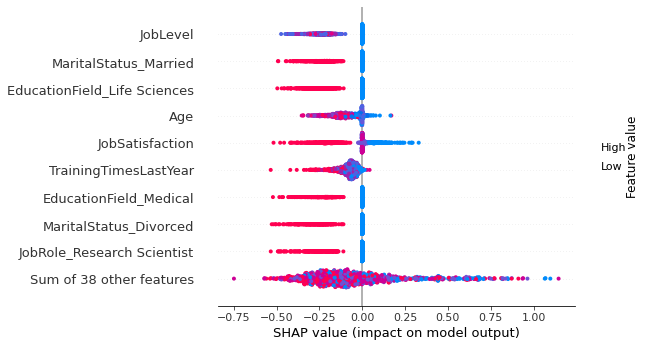

In [137]:
shap.plots.beeswarm(shap_values)

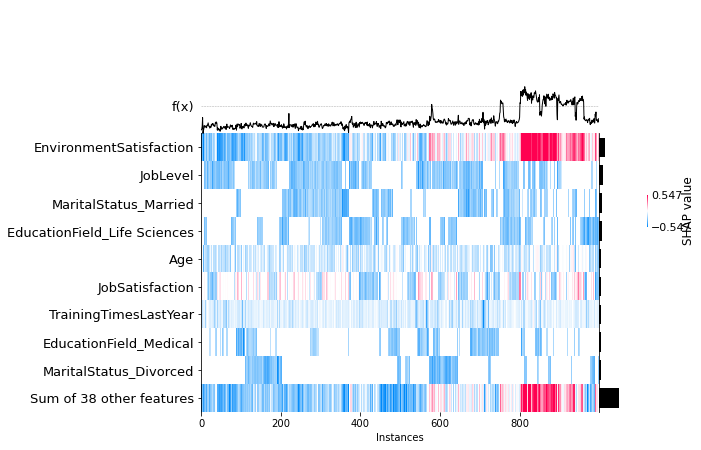

In [138]:
shap.plots.heatmap(shap_values)

In [ ]:
shap.initjs()
explainer = shap.KernelExplainer(XGBoost.predict_proba, x)
shap_values = explainer.shap_values(X_test.iloc[0,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0,:])

In [ ]:
shap.initjs()
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

### Counterfactual cases

In [196]:
# import DiCE
import dice_ml

In [140]:
# Load preprocessed dataset
df

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,1102,1,2,2,94,3,2,...,0,0,0,0,0,1,0,0,0,1
1,49,0,2,279,8,1,3,61,2,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1,1373,2,2,4,92,2,1,...,1,0,0,0,0,0,0,0,0,1
3,33,0,2,1392,3,4,4,56,3,1,...,0,0,0,0,1,0,0,0,1,0
4,27,0,1,591,2,1,1,40,3,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,884,23,2,3,41,4,2,...,1,0,0,0,0,0,0,0,1,0
1466,39,0,1,613,6,1,4,42,2,3,...,0,0,0,0,0,0,0,0,1,0
1467,27,0,1,155,4,3,2,87,4,2,...,0,0,1,0,0,0,0,0,1,0
1468,49,0,2,1023,2,3,4,63,2,2,...,0,0,0,0,0,1,0,0,1,0


In [144]:
# Obtain the list of employees who have left the company from test group 

test = pd.concat([X_test,y_test],axis=1)
left = test.loc[test['Attrition']==1]
left

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Attrition
42,-1.196177,1,1.374698,1.950552,3,1,-0.880361,1,1,3,...,0,0,0,0,0,0,0,0,1,1
547,0.555852,2,0.323558,1.210187,3,3,-0.437503,4,1,3,...,0,0,0,1,0,0,1,0,0,1
1396,1.760373,1,0.906147,1.827158,4,1,0.005356,3,3,1,...,0,0,0,0,1,0,0,0,1,1
777,-1.743687,1,1.317678,0.099639,3,3,-1.470840,2,1,1,...,0,0,0,0,0,0,0,0,1,1
36,1.431867,1,0.164896,-0.764121,2,1,0.989486,2,1,3,...,0,0,0,0,0,1,0,1,0,1
911,-1.305679,2,-0.504462,1.827158,1,3,0.349801,1,1,4,...,0,0,0,0,0,1,0,0,1,1
947,1.650871,1,0.564031,-0.517332,3,2,-0.093057,3,3,2,...,0,0,0,0,1,0,0,0,1,1
421,-0.867672,1,-0.977970,1.950552,5,3,0.251388,2,1,2,...,0,0,0,1,0,0,0,1,0,1
1354,2.088878,1,0.891273,1.827158,2,1,1.530758,3,1,4,...,0,0,0,0,0,0,0,0,1,1
210,-0.539166,1,0.601218,-0.640727,4,4,-1.667666,1,3,4,...,0,0,0,0,1,0,0,1,0,1


In [209]:
# Select on employee as our study focus

input_datapoint = X_test.loc[[1273]]

In [207]:
# Dataset for training an ML model
d = dice_ml.Data(dataframe=df, continuous_features=continuous_features, outcome_name='Attrition')

# Pre-trained XGBoost model
m = dice_ml.Model(model=XGBoost, backend='sklearn')

# DiCE explanation instance
exp = dice_ml.Dice(d,m)

In [210]:
# Generate counterfactual examples

features_to_vary=['DailyRate','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike',
                  'TrainingTimesLastYear','YearsSinceLastPromotion','YearsWithCurrManager']

dice_exp = exp.generate_counterfactuals(input_datapoint, total_CFs=4, desired_class="opposite",features_to_vary=features_to_vary)
# Visualize counterfactual explanation
dice_exp.visualize_as_dataframe()

100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

Query instance (original outcome : 0)


,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Attrition
0,-1.634185,1,1.218514,-0.14715,1,3,0.645041,3,1,1,...,0,0,0,0,0,0,0,1,0,0



Diverse Counterfactual set (new outcome: 1.0)


,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Attrition
0,-2.634185,1.0,1.0,0.0,1.0,3.0,1.645041,3.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,-2.634185,1.0,1.0,0.0,1.0,3.0,1.645041,3.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,-2.634185,1.0,1.0,0.0,1.0,3.0,1.645041,3.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,-2.634185,1.0,1.0,0.0,1.0,3.0,1.645041,3.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [157]:
# # Create feasible Counterfactuals
# features_to_vary=['BusinessTravel','DailyRate','HourlyRate','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','OverTime',
#                   'PercentSalaryHike','RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance',
#                   'YearsSinceLastPromotion','YearsWithCurrManager']

# features_to_vary=['BusinessTravel','DailyRate','HourlyRate','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','OverTime',
#                   'PercentSalaryHike','RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance',
#                   'YearsSinceLastPromotion','YearsWithCurrManager']

# # permitted_range={'BusinessTravel':['0','1','2'],
#                 # 'JobLevel':['1','2','3','4','5'],
#                 # 'JobSatisfaction':[1,5], # There is no 5 in the dataset, but we assume that 5 would be the highest score
#                 # 'RelationshipSatisfaction': [1,5], # There is no 5 in the dataset, but we assume that 5 would be the highest score
#                 # 'WorkLifeBalance': [1,5],  # There is no 5 in the dataset, but we assume that 5 would be the highest score (satisfaction)
#                 # 'PercentSalaryHike': [11,30] # Current range is 11-25, we will set the highest as 30
#                 # }

# # Generate counterfactual examples
# dice_exp = exp.generate_counterfactuals(input_datapoint, total_CFs=4, desired_class="opposite",features_to_vary=features_to_vary)
# # Visualize counterfactual explanation
# dice_exp.visualize_as_dataframe()


  0%|          | 0/1 [00:00<?, ?it/s]


ValueError: DataFrame.dtypes for data must be int, float, bool or category.  When
categorical type is supplied, DMatrix parameter `enable_categorical` must
be set to `True`. Invalid columns:BusinessTravel, JobLevel, JobSatisfaction, OverTime, RelationshipSatisfaction, StockOptionLevel, WorkLifeBalance